In [1]:
using DataFrames
using Gadfly
set_default_plot_size(30cm, 12cm)
home = "/home/german/labo/18/lbp/run"

"/home/german/labo/18/lbp/run"

In [2]:
function get_κ(in_vec::Array{Float64, 1})
    not_null = copy(in_vec)
    not_null[not_null .== 0] = 0.000001
    const κ = (exp.(-mapslices(x -> sum(x), mapslices(x->x.^2 .* log.(x.^2), not_null, 1), 1))
        / length(not_null))[1]
    return κ
end

get_κ (generic function with 1 method)

In [3]:
function get_pnum(in_vec::Array{Float64, 1})
    nor_vec = in_vec ./ norm(in_vec) 
    return convert(Int64, round(sum(nor_vec .^ 4) .^ -1))
end

get_pnum (generic function with 1 method)

In [4]:
function tognm(vtor_anm)
    vtor_gnm = Array{Float64}(convert(Int64, length(vtor_anm)/3));
    vtor_anm =  vtor_anm.^2
    for i=1:convert(Int64, length(vtor_anm)/3)
        vtor_gnm[i] = sqrt(vtor_anm[i*3-2] + vtor_anm[i*3-1] + vtor_anm[i*3])
    end
    return vtor_gnm
end

tognm (generic function with 1 method)

In [5]:
function dist_mode(freq::Float64)
    # Declaro cte de boltzmann, avogadro, y temperatura.
    Kb = 1.38064852e-23
    A = 6.0221409e+23
    T = 298
    AKbT = A * Kb * T
    
    return d^2 * 0.5 * KBT * evals.^2 / cte # KJ/mol
end

dist_mode (generic function with 1 method)

In [6]:
function WeightedHist(in_vec, in_bins, in_weight, density = false)
    # Safety check    
    if length(in_vec) != length(in_weight)
        println("Each element of the input vector needs one weight")
        return
    end
    
    # Prepare variables
    out_counts = Array{Float64}(length(in_bins)-1)
    
    # Get weighted histogram
    for i=1:length(in_bins)-1
        temp_bool = (in_vec .>= in_bins[i]) .& (in_vec .< in_bins[i+1])
        out_counts[i] = sum(in_weight[temp_bool])
    end
    
    # Get bins middle points
    out_middle = (in_bins[1:end-1] + in_bins[2:end]) / 2
    
    # Turn counts into density
    if (density == true)
        out_counts = out_counts ./ sum(out_counts) 
    end
    return out_counts, out_middle
end

WeightedHist (generic function with 2 methods)

In [7]:
function energia_gdte(evals::Array{Float64, 1}, gdte::Array{Float64, 1}, d::Float64 = 1.)

    if length(evals) != length(gdte)
        error("Lengths of evals and gdte don't match. Aborting.") 
    end
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831
    
    return d^2 * 0.5 * KBT * sum(evals.^2 .* gdte.^2) / cte # KJ/mol
end

energia_gdte (generic function with 2 methods)

In [8]:
function energia_modes(evals::Array{Float64, 1}, d::Float64 = 1.)
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831

    return d^2 * 0.5 * KBT * sum(evals.^2) / cte # KJ/mol
end

energia_modes (generic function with 2 methods)

In [9]:
function E_modes_wvgv(evals::Array{Float64, 1}, gdte::Array{Float64, 1}, d::Float64 = 1.)

    if length(evals) != length(gdte)
        error("Lengths of evals and gdte don't match. Aborting.") 
    end
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831
    
    return d^2 * 0.5 * KBT * (evals.^2 .* gdte.^2) / cte # KJ/mol
end

E_modes_wvgv (generic function with 2 methods)

In [10]:
function E_modes(evals::Array{Float64, 1}, d::Float64 = 1.)
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831
    
    return d^2 * 0.5 * KBT * evals.^2 / cte # KJ/mol
end

E_modes (generic function with 2 methods)

In [11]:
function read_ptraj_modes(filename, nmodes::Int64=0, norma::Bool=true)
    modes_text = readdlm(filename, skipstart=0, skipblanks=true, comments=true,
        comment_char='\*')

    if nmodes == 0
        nmodes = modes_text[1, 5]
    end
    modes_elements = modes_text[2, 1]

    ncoords = convert(Int64, modes_elements)
    lines = ceil(Int64, ncoords/7)
    rest = convert(Int64, ncoords % 7)

    eval = Array{Float64}(nmodes);
    mode = Array{Float64}(ncoords, nmodes);
    temp1 = Array{Float64}(ncoords, 1);
    temp2 = Array{Float64}(ncoords+(7-rest));

    j=lines + 1 + 2 # 1 p/ q lea la prox linea 2 por el header
    for i=1:nmodes
        eval[i] = modes_text[j, 2]
        temp = permutedims(modes_text[(j+1):(lines+j), :], [2, 1])
        temp2 = reshape(temp, ncoords+(7-rest))
        for k=(rest+1):7
            pop!(temp2)
        end
        mode[:, i] = temp2
        j = j + lines + 1
    end

    if norma == true
        for i=1:nmodes
            mode[: ,i] = mode[:, i] / norm(mode[:, i])
        end
    end

    return mode, eval
end

read_ptraj_modes (generic function with 3 methods)

### Lee modos, volumen original y  volúmenes NDD. Obtiene VGV

In [12]:
pdb_list = [ "1ael" ; "1ure" ; "4uet" ; "4xcp" ]

for each in pdb_list
    # Leo modos
    sym_mode = Symbol("modes_", each)
    sym_eval = Symbol("evals_", each)
    tmp_mode, tmp_eval = read_ptraj_modes(joinpath(home, each,  "pca", string("full_modes_", each)))
    eval(:($sym_mode = $tmp_mode))
    eval(:($sym_eval = $tmp_eval))
    
    # Leo volúmenes originales
    sym_vol = Symbol("vol_avg_", each)
    tmp_vol = convert(Float64,
        readdlm(joinpath(home, each,  "ndd", string("vol_avg_", each)))[3])
    eval(:($sym_vol = $tmp_vol))
    
    # Leo volúmenes NDD
    sym_ndd_out = Symbol("ndd_out_", each)
    tmp_ndd_out = convert(Array{Float64, 1},
        readdlm(joinpath(home, each,  "ndd", string("out_ndd_", each)))[2:end, 2])
    eval(:($sym_ndd_out = $tmp_ndd_out))
    
    # VGV
    sym_vgv = Symbol("vgv_", each)
    tmp_vgv = eval(:($sym_ndd_out .- $sym_vol))
    eval(:($sym_vgv = $tmp_vgv ./ norm($tmp_vgv)))
end

### Obtiene los pnum modos y pnum eigenvals

In [41]:
# Obtengo pnum de los VGV
for each in pdb_list
    # Pnumber de VGV
    sym_pnu = Symbol("pnu_", each)
    sym_vgv = Symbol("vgv_", each)
    tmp_pnu = eval(:(get_pnum($sym_vgv)))
    eval(:($sym_pnu = $tmp_pnu))
    
    # Pnumber indices
    sym_idx = Symbol("idx_pnu_", each)
    eval(:($sym_idx = sortperm(abs.($sym_vgv), rev=true)[1:$tmp_pnu]))
    
    # Pnumber modes
    sym_modes = Symbol("modes_", each)
    sym_pnu_modes = Symbol("pnu_modes_", each)
    eval(:($sym_pnu_modes = $sym_modes[:, $sym_idx]))
    
    # Pnumber eigenvalues
    sym_evals = Symbol("evals_", each)
    sym_pnu_evals = Symbol("pnu_evals_", each)
    eval(:($sym_pnu_evals = $sym_evals[$sym_idx]))
    
    # VGV cartesiano
    sym_xyz_vgv = Symbol("xyz_vgv_", each)
    eval(:($sym_xyz_vgv = $sym_modes * $sym_vgv))
    
    # Pnumber aminoácidos según VGV (aminoácidos de la pared)
    sym_aa_pnu_ = Symbol("aa_pnu_", each)
    eval(:($sym_aa_pnu_ = get_pnum($sym_xyz_vgv)))
    
    # Índices de pnumber aminoácidos
    sym_idx_pnu_aa = Symbol("idx_pnu_aa_", each)
    eval(:($sym_idx_pnu_aa = sortperm(abs.($sym_xyz_vgv), rev = true)[1:$sym_aa_pnu_]))
    
    # Todos los modos recortados según pnumber aminoácidos
    sym_modes_cut = Symbol("modes_cut_", each)
    eval(:($sym_modes_cut = $sym_modes[$sym_idx_pnu_aa, :]))
    # Normalizo
    eval(:($sym_modes_cut = mapslices(x -> x ./ norm(x), $sym_modes_cut, 1)))
    
    # Pnum modos recortados según pnumber aminoácidos
    sym_pnu_modes_cut = Symbol("pnu_modes_cut_", each)
    eval(:($sym_pnu_modes_cut = $sym_pnu_modes[$sym_idx_pnu_aa, :]))
    # Normalizo
    eval(:($sym_pnu_modes_cut = mapslices(x -> x ./ norm(x), $sym_pnu_modes_cut, 1)))
    
    # Colectividad de modos enteros
    sym_κ_modes = Symbol("κ_", each)
    tmp = eval(:(mapslices(x -> get_κ(x), $sym_modes, 1)))
    eval(:($sym_κ_modes = reshape($tmp, length($tmp))))
    
    # Colectividad de pnum modos enteros
    sym_pnu_κ_modes = Symbol("pnu_κ_", each)
    tmp = eval(:(mapslices(x -> get_κ(x), $sym_pnu_modes, 1)))
    eval(:($sym_pnu_κ_modes = reshape($tmp, length($tmp))))
    
    # Colectividad de pnum modos recortados
    sym_κ_modes_cut = Symbol("pnu_κ_cut_", each)
    tmp = eval(:(mapslices(x -> get_κ(x), $sym_pnu_modes_cut, 1)))
    eval(:($sym_κ_modes_cut = reshape($tmp, length($tmp))))
    
    # Pnumber de modos enteros
    sym_col_pnu_modes = Symbol("col_pnu_modes_", each)
    tmp = eval(:(mapslices(x -> get_pnum(x), $sym_modes, 1)))
    eval(:($sym_col_pnu_modes = reshape($tmp, length($tmp))))
    
    # Pnumber de pnum modos enteros
    sym_col_pnu_modes_pnu = Symbol("col_pnu_modes_pnu_", each)
    tmp = eval(:(mapslices(x -> get_pnum(x), $sym_pnu_modes, 1)))
    eval(:($sym_col_pnu_modes_pnu = reshape($tmp, length($tmp))))
    
    # Pnumber de modos cut
    sym_col_pnu_modes_cut = Symbol("col_pnu_modes_cut_", each)
    tmp = eval(:(mapslices(x -> get_pnum(x), $sym_modes_cut, 1)))
    eval(:($sym_col_pnu_modes_cut = reshape($tmp, length($tmp))))
    
    # Pnumber de pnum modos cut
    sym_col_pnu_modes_pnu_cut = Symbol("col_pnu_modes_pnu_cut_", each)
    tmp = eval(:(mapslices(x -> get_pnum(x), $sym_pnu_modes_cut, 1)))
    eval(:($sym_col_pnu_modes_pnu_cut = reshape($tmp, length($tmp))))
end

# Frecuencia

In [43]:
# 1AEL
# Los bins van de 0 a la fqcia más alta + 10%
top_evals = maximum(evals_1ael)
bins_evals = collect(0:25:top_evals)

# Histograma ponderado
Whis_evals_1ael, Wbins_evals_1ael = WeightedHist(evals_1ael, bins_evals, abs.(vgv_1ael), true);
df_Whis_evals_1ael = DataFrame(Probability = Whis_evals_1ael, Frequency = Wbins_evals_1ael);

# 1URE
# Los bins van de 0 a la fqcia más alta + 10%
top_evals = maximum(evals_1ure)
bins_evals = collect(0:25:top_evals)

# Histograma ponderado
Whis_evals_1ure, Wbins_evals_1ure = WeightedHist(evals_1ure, bins_evals, abs.(vgv_1ure), true);
df_Whis_evals_1ure = DataFrame(Probability = Whis_evals_1ure, Frequency = Wbins_evals_1ure);

# 4UET
# Los bins van de 0 a la fqcia más alta + 10%
top_evals = maximum(evals_4uet)
bins_evals = collect(0:25:top_evals)

# Histograma ponderado
Whis_evals_4uet, Wbins_evals_4uet = WeightedHist(evals_4uet, bins_evals, abs.(vgv_4uet), true);
df_Whis_evals_4uet = DataFrame(Probability = Whis_evals_4uet, Frequency = Wbins_evals_4uet);

# 4XCP
# Los bins van de 0 a la fqcia más alta + 10%
top_evals = maximum(evals_4xcp)
bins_evals = collect(0:25:top_evals)

# Histograma ponderado
Whis_evals_4xcp, Wbins_evals_4xcp = WeightedHist(evals_4xcp, bins_evals, abs.(vgv_4xcp), true);
df_Whis_evals_4xcp = DataFrame(Probability = Whis_evals_4xcp, Frequency = Wbins_evals_4xcp);

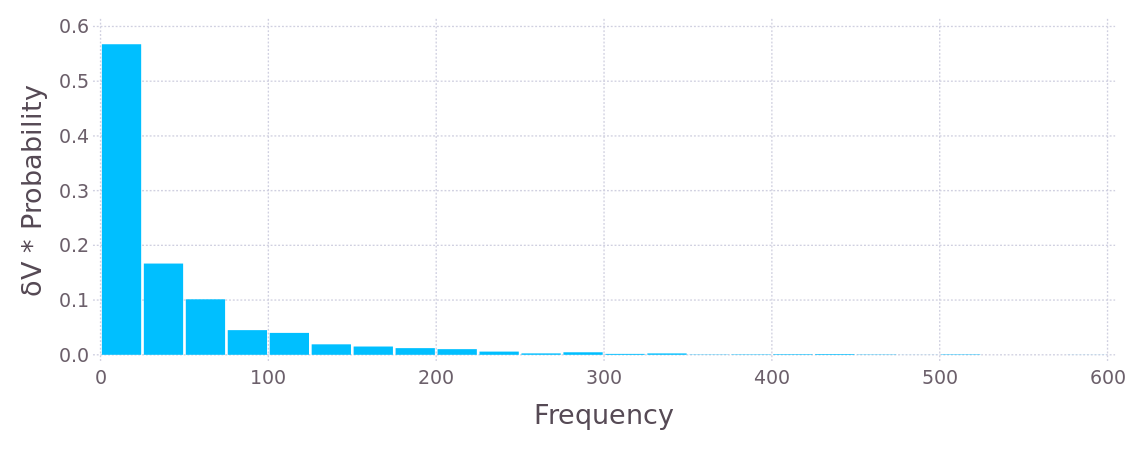

In [44]:
pdf_Whis_evals_1ael = plot(df_Whis_evals_1ael, x="Frequency", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

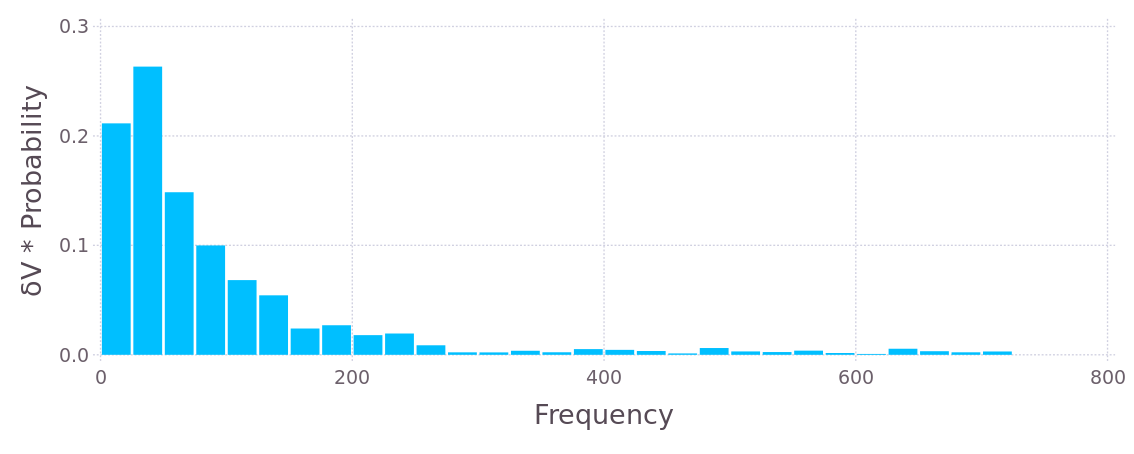

In [45]:
pdf_Whis_evals_1ure = plot(df_Whis_evals_1ure, x="Frequency", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

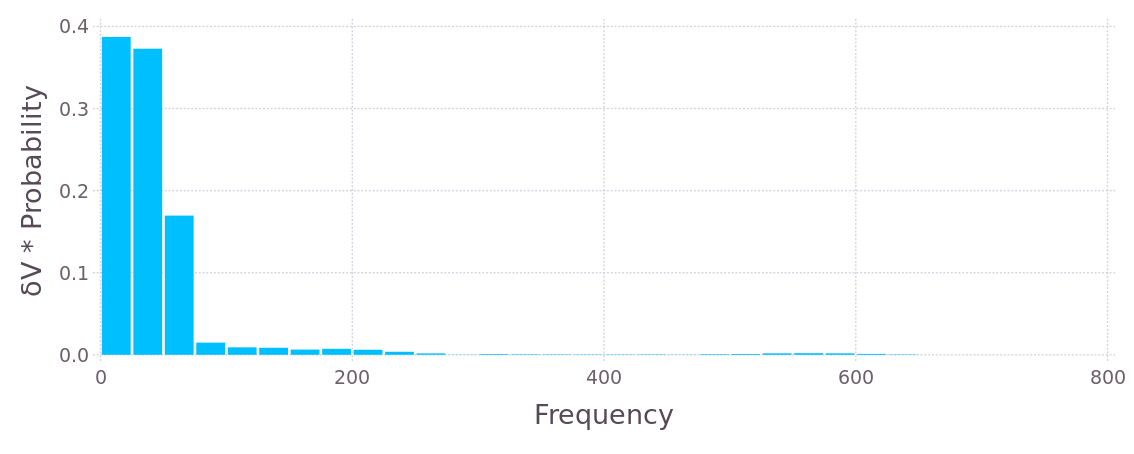

In [46]:
pdf_Whis_evals_4uet = plot(df_Whis_evals_4uet, x="Frequency", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

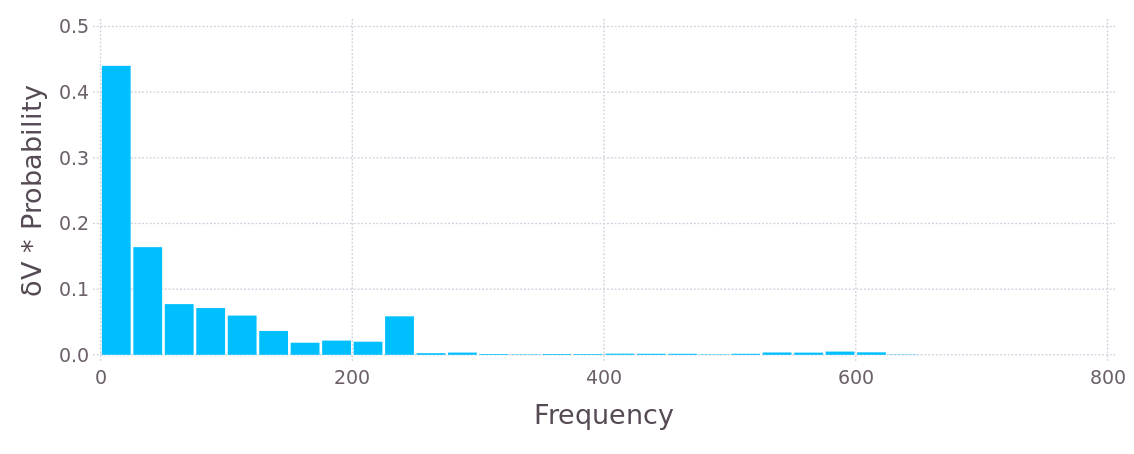

In [47]:
pdf_Whis_evals_4xcp = plot(df_Whis_evals_4xcp, x="Frequency", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

# Colectividad

In [48]:
# 1AEL
# Los bins van de 0 a la fqcia más alta + 10%
top_κ = maximum(κ_1ael)
bins_κ = collect(0:.02:top_κ)

# Histograma ponderado
Whis_κ_1ael, Wbins_κ_1ael = WeightedHist(κ_1ael, bins_κ, abs.(vgv_1ael), true);
df_Whis_κ_1ael = DataFrame(Probability = Whis_κ_1ael, κ = Wbins_κ_1ael);

# 1URE
# Los bins van de 0 a la fqcia más alta + 10%
top_κ = maximum(κ_1ure)
bins_κ = collect(0:.02:top_κ)

# Histograma ponderado
Whis_κ_1ure, Wbins_κ_1ure = WeightedHist(κ_1ure, bins_κ, abs.(vgv_1ure), true);
df_Whis_κ_1ure = DataFrame(Probability = Whis_κ_1ure, κ = Wbins_κ_1ure);

# 4UET
# Los bins van de 0 a la fqcia más alta + 10%
top_κ = maximum(κ_4uet)
bins_κ = collect(0:.02:top_κ)

# Histograma ponderado
Whis_κ_4uet, Wbins_κ_4uet = WeightedHist(κ_4uet, bins_κ, abs.(vgv_4uet), true);
df_Whis_κ_4uet = DataFrame(Probability = Whis_κ_4uet, κ = Wbins_κ_4uet);

# 4XCP
# Los bins van de 0 a la fqcia más alta + 10%
top_κ = maximum(κ_4xcp)
bins_κ = collect(0:.02:top_κ)

# Histograma ponderado
Whis_κ_4xcp, Wbins_κ_4xcp = WeightedHist(κ_4xcp, bins_κ, abs.(vgv_4xcp), true);
df_Whis_κ_4xcp = DataFrame(Probability = Whis_κ_4xcp, κ = Wbins_κ_4xcp);

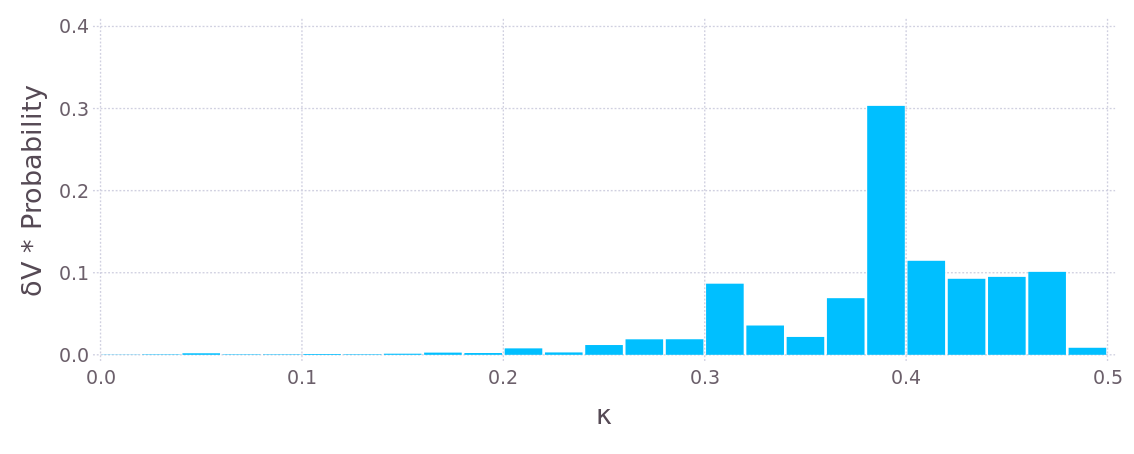

In [49]:
pdf_Whis_κ_1ael = plot(df_Whis_κ_1ael, x="κ", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

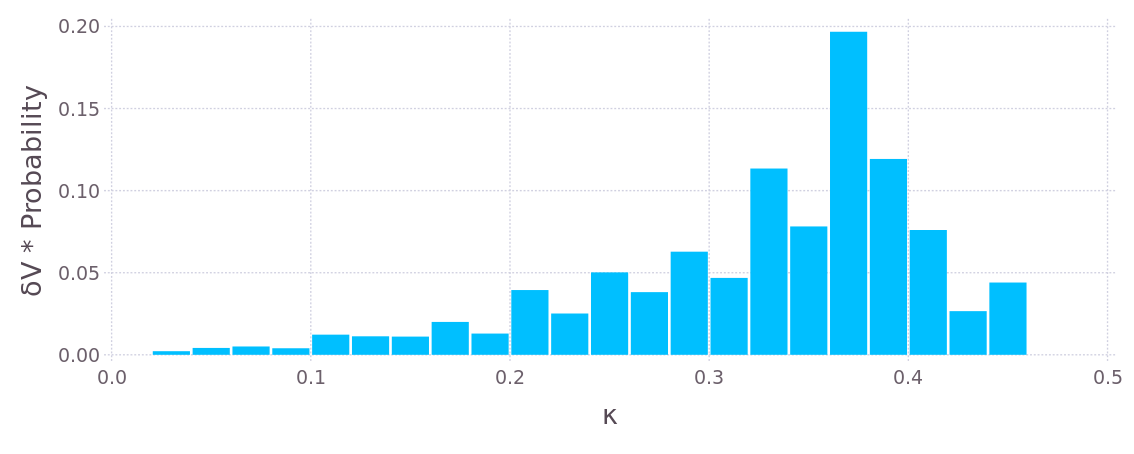

In [50]:
pdf_Whis_κ_1ure = plot(df_Whis_κ_1ure, x="κ", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

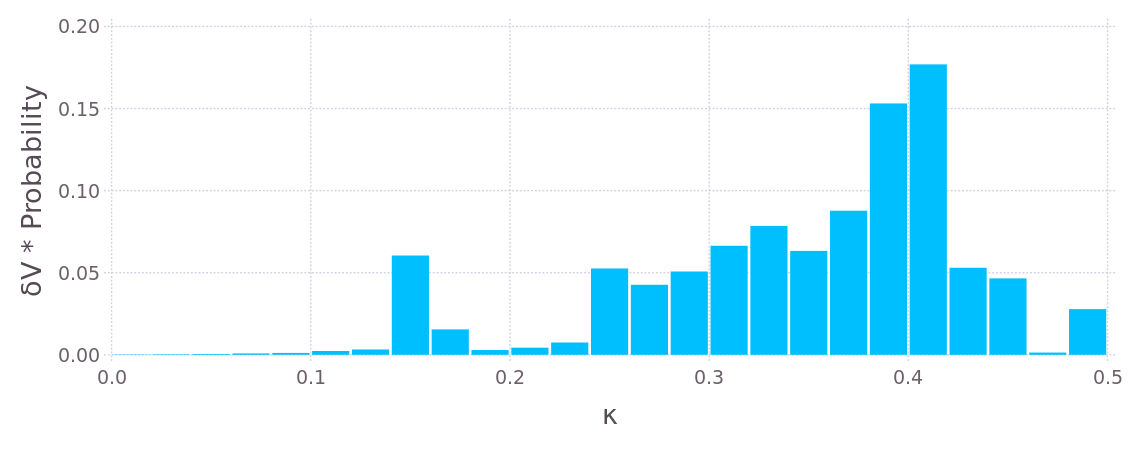

In [51]:
pdf_Whis_κ_4uet = plot(df_Whis_κ_4uet, x="κ", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

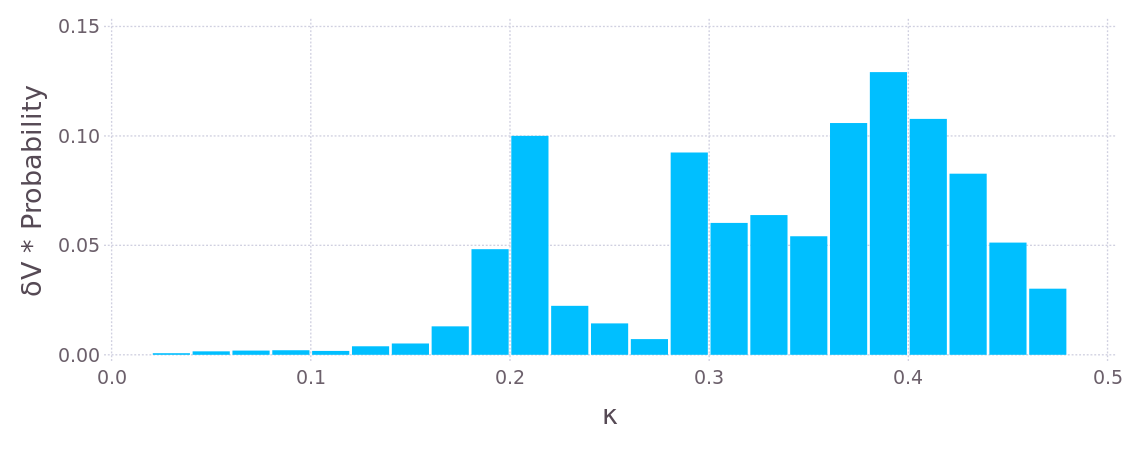

In [52]:
pdf_Whis_κ_4xcp = plot(df_Whis_κ_4xcp, x="κ", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

# Colectividad en pnumber

In [58]:
# 1AEL
# Los bins van de 0 a la fqcia más alta + 10%
top_col = maximum(col_pnu_modes_1ael)
bins_col = collect(0:5:top_col)

# Histograma ponderado
Whis_col_1ael, Wbins_col_1ael = WeightedHist(col_pnu_modes_1ael, bins_col, abs.(vgv_1ael), true);
df_Whis_col_1ael = DataFrame(Probability = Whis_col_1ael, Pnumber = Wbins_col_1ael);

# 1URE
# Los bins van de 0 a la fqcia más alta + 10%
top_col = maximum(col_pnu_modes_1ure)
bins_col = collect(0:5:top_col)

# Histograma ponderado
Whis_col_1ure, Wbins_col_1ure = WeightedHist(col_pnu_modes_1ure, bins_col, abs.(vgv_1ure), true);
df_Whis_col_1ure = DataFrame(Probability = Whis_col_1ure, Pnumber = Wbins_col_1ure);

# 4UET
# Los bins van de 0 a la fqcia más alta + 10%
top_col = maximum(col_pnu_modes_4uet)
bins_col = collect(0:5:top_col)

# Histograma ponderado
Whis_col_4uet, Wbins_col_4uet = WeightedHist(col_pnu_modes_4uet, bins_col, abs.(vgv_4uet), true);
df_Whis_col_4uet = DataFrame(Probability = Whis_col_4uet, Pnumber = Wbins_col_4uet);

# 4XCP
# Los bins van de 0 a la fqcia más alta + 10%
top_col = maximum(col_pnu_modes_4xcp)
bins_col = collect(0:5:top_col)

# Histograma ponderado
Whis_col_4xcp, Wbins_col_4xcp = WeightedHist(col_pnu_modes_4xcp, bins_col, abs.(vgv_4xcp), true);
df_Whis_col_4xcp = DataFrame(Probability = Whis_col_4xcp, Pnumber = Wbins_col_4xcp);

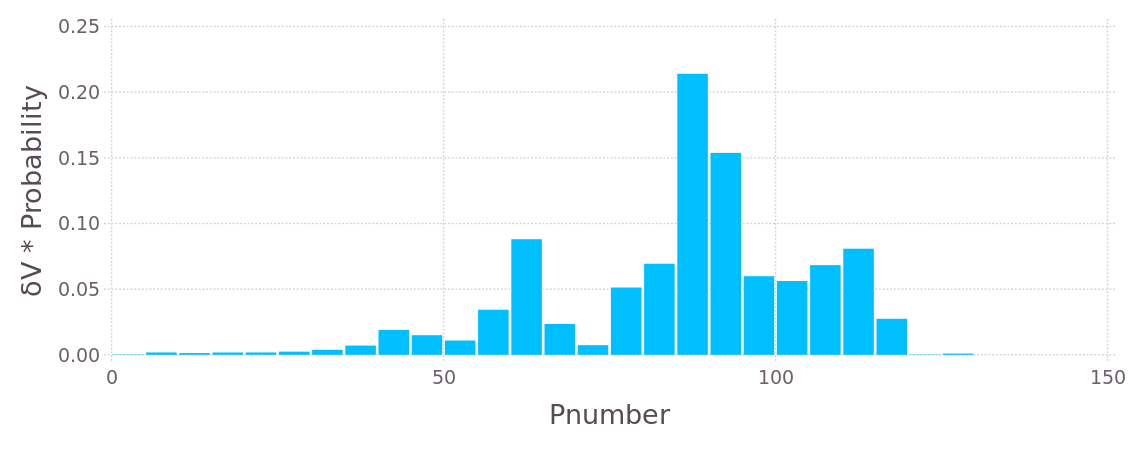

In [59]:
pdf_Whis_col_1ael = plot(df_Whis_col_1ael, x="Pnumber", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

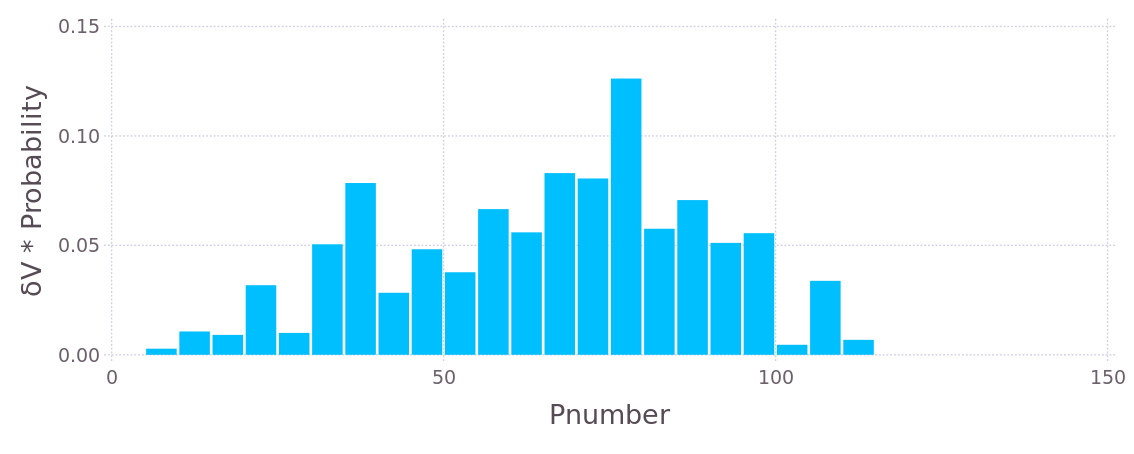

In [60]:
pdf_Whis_col_1ure = plot(df_Whis_col_1ure, x="Pnumber", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

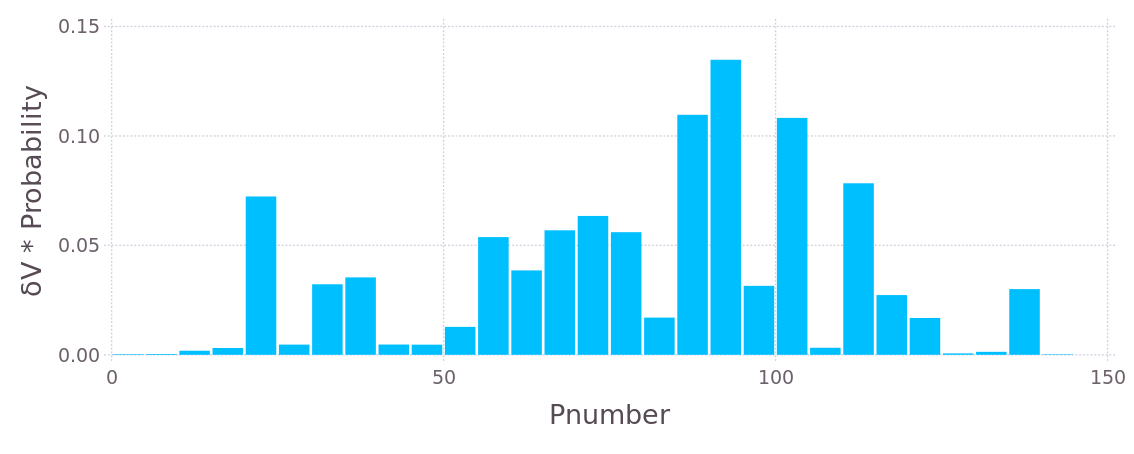

In [61]:
pdf_Whis_col_4uet = plot(df_Whis_col_4uet, x="Pnumber", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

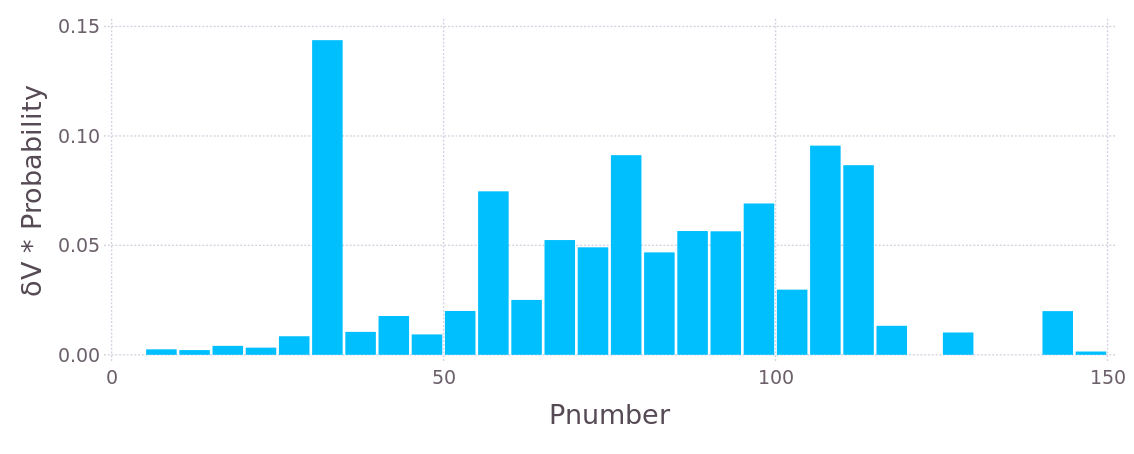

In [62]:
pdf_Whis_col_4xcp = plot(df_Whis_col_4xcp, x="Pnumber", y="Probability", Geom.bar,
    #Guide.title("Figure 1.A"),
    # Guide.xlabel("Frecuency (cm<sup>-1</sup>)"), Guide.xticks(ticks=collect(0:50:775)),
    Guide.ylabel("δV * Probability", orientation=:vertical),
    Theme(bar_spacing=2pt, grid_line_width=1pt, Theme(default_color=colorant"deepskyblue"),
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

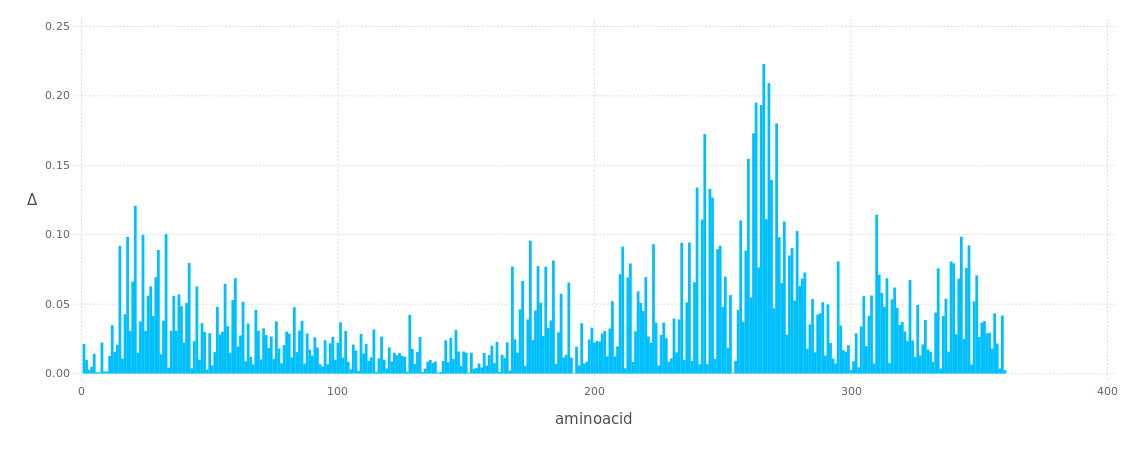

In [128]:
df_xyz_vgv_1ael = DataFrame(Δ = abs.(xyz_vgv_1ael), aminoacid = collect(1:length(xyz_vgv_1ael)));

pdf_xyz_vgv_1ael = plot(df_xyz_vgv_1ael, y = "Δ", x = "aminoacid",
    Geom.bar)